In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pylab
import seaborn as sns
sns.set(style='ticks', palette='Set2')
import prettyplotlib
import plotly.graph_objects as go
import plotly.express as px
from collections import OrderedDict
from matplotlib.transforms import blended_transform_factory
from mpl_toolkits.mplot3d import Axes3D

In [86]:
# load in datasets
conversion_new_load_import = "final_clean_imports.csv"
conversion_new_load_export = "final_clean_exports.csv"

# read in csv

new_import_df = pd.read_csv(conversion_new_load_import)
new_export_df = pd.read_csv(conversion_new_load_export)

# see if it works

new_import_df.head()

,Unnamed: 0,Unnamed: 0.1,Commodity,Country,UNIT_DESC,Year,AMOUNT,Metric Tons
0,0,30128,Beef,Argentina,KG,2006,137101.0,137.101
1,1,30129,Beef,Argentina,KG,2006,87009.0,87.009
2,2,30150,Beef,Argentina,KG,2006,9386.0,9.386
3,3,30151,Beef,Argentina,KG,2006,19475.0,19.475
4,4,30152,Beef,Argentina,KG,2006,122693.0,122.693


In [87]:
new_export_df.head()

,Unnamed: 0,Unnamed: 0.1,Commodity,Country,UNIT_DESC,Year,AMOUNT,Metric Tons
0,15282,26074,Beef,Argentina,KG,2006,11210.000000,11.210000
1,15283,26077,Beef,Argentina,CWE,2006,33708.898999,1529.035659
2,15284,104465,Chicken,Argentina,KG,2006,4920.000000,4.920000
3,15285,243485,Sheep,Argentina,CWE,2006,2866.008600,130.002150
4,15286,286418,Pork,Argentina,KG,2006,39010.000000,39.010000


In [88]:
#group exports by country and year
summary_country_exports = new_export_df.groupby(["Country","Year"]).sum().reset_index()
summary_country_exports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,520149,24099437,6.971755e+05,21276.777788
1,Argentina,2007,429226,21334124,1.509824e+06,50093.451525
2,Argentina,2008,399269,18925406,8.081837e+05,26772.920599
3,Argentina,2009,215271,10629624,3.856750e+05,12562.097925
4,Argentina,2010,1172034,41546741,4.027077e+06,103482.865695


In [89]:
#data munge and convert to percent change
summary_export_pivot = summary_country_exports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_export_pct = summary_export_pivot.pct_change()
summary_export_pct

Country,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,NaN
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


In [90]:
#group imports by country and year
summary_country_imports = new_import_df.groupby(["Country","Year"]).sum().reset_index()
summary_country_imports.head()

,Country,Year,Unnamed: 0,Unnamed: 0.1,AMOUNT,Metric Tons
0,Argentina,2006,12403,22017679,2.127011e+08,7.824668e+06
1,Argentina,2007,30083,17998645,1.715963e+08,6.316710e+06
2,Argentina,2008,45504,18750702,1.390987e+08,5.112003e+06
3,Argentina,2009,71905,21202413,1.087845e+08,3.992219e+06
4,Argentina,2010,72326,14458465,1.070546e+08,3.923230e+06


In [91]:
#data munge and convert to percent change
summary_import_pivot = summary_country_imports.pivot(index="Year", columns="Country", values="Metric Tons")
summary_import_pct = summary_import_pivot.pct_change()
summary_import_pct

Country,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kingdom
Year,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.192718,0.009843,-0.492449,NaN,-0.610613,-0.488134,NaN,0.0,0.153532,2.081172,0.137898,NaN,0.154928,0.082090
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,NaN,0.0,-0.036204,-0.731545,-0.204057,NaN,0.005786,-0.013669
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,NaN,0.0,-0.063439,-0.032049,0.135787,NaN,-0.040746,0.264801
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,NaN,0.0,0.172179,-0.702514,0.464830,NaN,0.127193,0.022107
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,NaN,0.0,0.075216,-0.954303,0.373189,NaN,-0.083048,0.051416
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,NaN,0.0,0.267775,16.869376,0.449106,NaN,0.075659,0.188516
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,NaN,0.0,0.036933,6.386284,-0.003730,NaN,0.166616,0.274949
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,NaN,0.0,0.140652,1.538943,0.227116,NaN,0.873080,0.106668


In [92]:
total_export = pd.DataFrame(summary_export_pct, columns= ['Argentina', 'Australia', 'Bulgaria', 'China (Mainland)', 'Colombia', 'France', 'Germany, Fed. Republic', 'Greece', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Peru', 'Poland', 'Saudi Arabia', 'Turkey', 'United Kingdom', 'Zambia'])
total_export

,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,NaN
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


In [93]:
total_import = pd.DataFrame(summary_import_pct, columns = ['Argentina', 'Australia', 'China (Mainland)', 'Colombia', 'France', 'Germany, Fed. Republic', 'Greece', 'India', 'Italy', 'Japan', 'Mexico', 'Peru', 'Poland', 'United Kindgom'])
total_import

,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kindgom
Year,,,,,,,,,,,,,,
2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,-0.192718,0.009843,-0.492449,NaN,-0.610613,-0.488134,NaN,0.0,0.153532,2.081172,0.137898,NaN,0.154928,NaN
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,NaN,0.0,-0.036204,-0.731545,-0.204057,NaN,0.005786,NaN
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,NaN,0.0,-0.063439,-0.032049,0.135787,NaN,-0.040746,NaN
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,NaN,0.0,0.172179,-0.702514,0.464830,NaN,0.127193,NaN
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,NaN,0.0,0.075216,-0.954303,0.373189,NaN,-0.083048,NaN
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,NaN,0.0,0.267775,16.869376,0.449106,NaN,0.075659,NaN
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,NaN,0.0,0.036933,6.386284,-0.003730,NaN,0.166616,NaN
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,NaN,0.0,0.140652,1.538943,0.227116,NaN,0.873080,NaN


In [94]:
# for whole dataframe
total_import = total_import.replace(np.nan, 0)
total_import

,Argentina,Australia,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Italy,Japan,Mexico,Peru,Poland,United Kindgom
Year,,,,,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0
2007,-0.192718,0.009843,-0.492449,0.000000,-0.610613,-0.488134,0.0,0.0,0.153532,2.081172,0.137898,0.0,0.154928,0.0
2008,-0.190718,-0.242639,1.357808,0.000000,5.876003,-0.022143,0.0,0.0,-0.036204,-0.731545,-0.204057,0.0,0.005786,0.0
2009,-0.219050,0.162863,-0.601025,0.000000,-0.455420,0.194351,0.0,0.0,-0.063439,-0.032049,0.135787,0.0,-0.040746,0.0
2010,-0.017281,-0.263164,0.107886,-0.997630,1.085058,0.161526,0.0,0.0,0.172179,-0.702514,0.464830,0.0,0.127193,0.0
2011,-0.025124,-0.172490,0.074418,0.000000,-0.113016,0.300321,0.0,0.0,0.075216,-0.954303,0.373189,0.0,-0.083048,0.0
2012,-0.947309,0.366182,0.063481,636.053437,1.640965,-0.124193,0.0,0.0,0.267775,16.869376,0.449106,0.0,0.075659,0.0
2013,0.949274,-0.023424,-0.262903,0.000000,-0.349474,0.172456,0.0,0.0,0.036933,6.386284,-0.003730,0.0,0.166616,0.0
2014,-0.551902,0.650670,2.381967,0.000000,0.312964,0.426241,0.0,0.0,0.140652,1.538943,0.227116,0.0,0.873080,0.0


In [95]:
# for whole dataframe
total_export = total_export.replace(np.nan, 0)
total_export

,Argentina,Australia,Bulgaria,China (Mainland),Colombia,France,"Germany, Fed. Republic",Greece,India,Indonesia,Italy,Japan,Mexico,Peru,Poland,Saudi Arabia,Turkey,United Kingdom,Zambia
Year,,,,,,,,,,,,,,,,,,,
2006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2007,1.354372,0.155372,-0.133336,0.397168,0.088714,7.715077,0.673492,0.036201,14.925406,-0.289598,2.997971,0.139340,-0.099973,1.481479,-0.854084,-0.147033,-0.274590,0.053113,0.000000
2008,-0.465541,0.402362,2.669045,0.265514,0.070145,0.742227,0.796156,-0.244641,2.696898,34.264077,0.858240,0.261100,0.288673,-0.284967,-0.137801,1.174905,0.073158,1.291422,1.445899
2009,-0.530791,0.178960,-0.884159,-0.286323,0.156915,-0.934719,-0.437523,0.327192,-0.169952,-0.424806,-0.453163,-0.026362,0.057995,3.114113,-0.088459,-0.259622,-0.135890,-0.600438,0.000000
2010,7.237706,0.170893,0.000000,-0.585284,0.345242,3.305647,0.411062,-0.502216,1.145758,1.104948,1.159862,0.092121,0.084402,1.172260,-0.871491,0.383495,-0.290141,-0.384641,-0.696934
2011,-0.146520,0.272214,0.000000,1.554098,0.050647,-0.188302,0.350359,-0.471370,-0.754158,0.504829,0.153127,0.200512,0.042643,-0.093562,-0.964851,0.385261,-0.054761,-0.487360,0.000000
2012,-0.974728,0.070008,0.000000,0.050441,0.315799,-0.658896,-0.075530,-0.428098,-0.555460,-0.744969,-0.256049,-0.088123,0.081000,0.658122,-0.978682,0.102408,0.511911,-0.271596,35.254181
2013,1.275118,-0.170253,-0.999231,-0.078777,0.436060,-0.725995,-0.006613,-0.395518,-0.106173,0.763521,0.146907,0.090205,0.098957,0.138995,-0.472821,0.755527,-0.014458,0.158724,0.000000
2014,6.242104,-0.082296,-0.506400,-0.260055,0.209983,0.334797,-0.149035,-0.583463,-0.707755,0.203714,0.004773,0.067333,0.115166,-0.113501,0.000000,-0.305770,0.048511,0.030958,0.000000


<function matplotlib.pyplot.show(*args, **kw)>

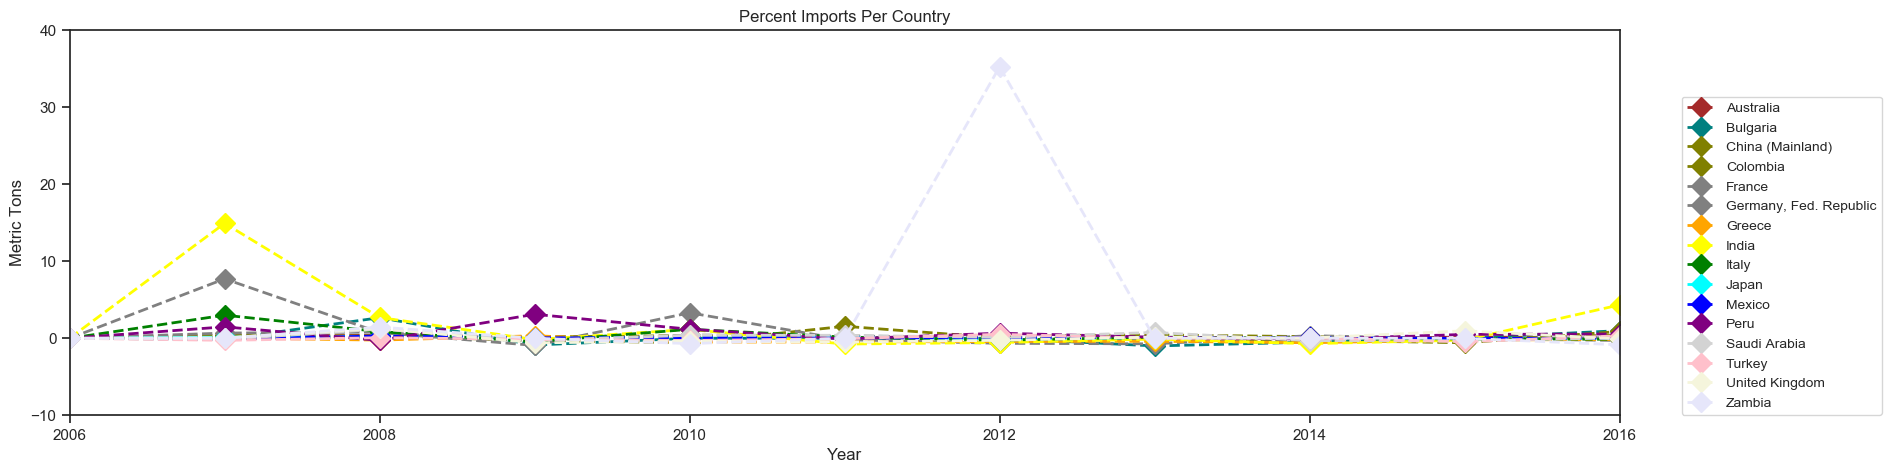

In [96]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []


for column in total_export:
     if column != "Argentina" and column != "Indonesia" and column != "Poland":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Columbia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
        
        x_axis = total_export.index
        y_axis = total_export[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=10, linestyle='dashed', linewidth=2)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)
plt.rcParams["figure.figsize"] = (20,5)
plt.title("Percent Imports Per Country")
plt.xlabel("Year")
plt.ylabel("Metric Tons")


# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(-10, 40)    
plt.xlim(2006, 2016)

plt.savefig("../p_branch_graphs/summary_imports.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

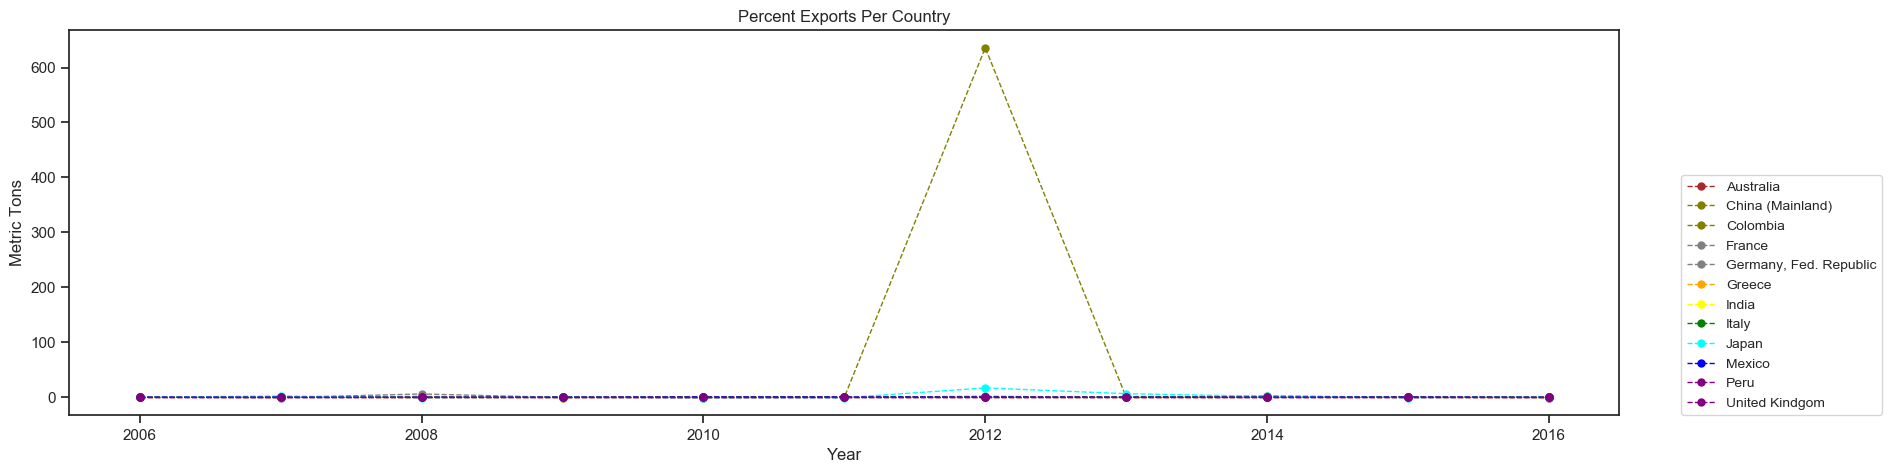

In [97]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in total_import:
     if column != "Argentina" and column != "Indonesia" and column != "Poland":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Columbia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
        
        x_axis = total_import.index
        y_axis = total_import[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=1)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)
plt.rcParams["figure.figsize"] = (20,5)
plt.title("Percent Exports Per Country")
plt.xlabel("Year")
plt.ylabel("Metric Tons")

plt.savefig("../p_branch_graphs/summary_exports.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

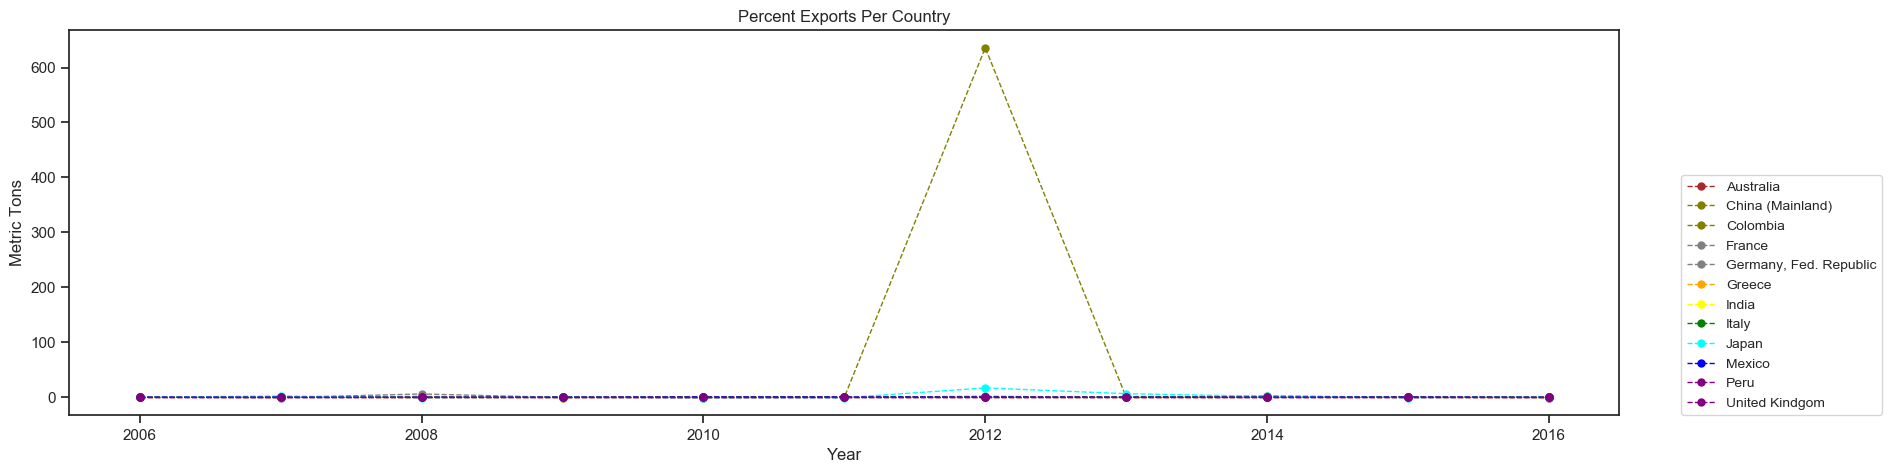

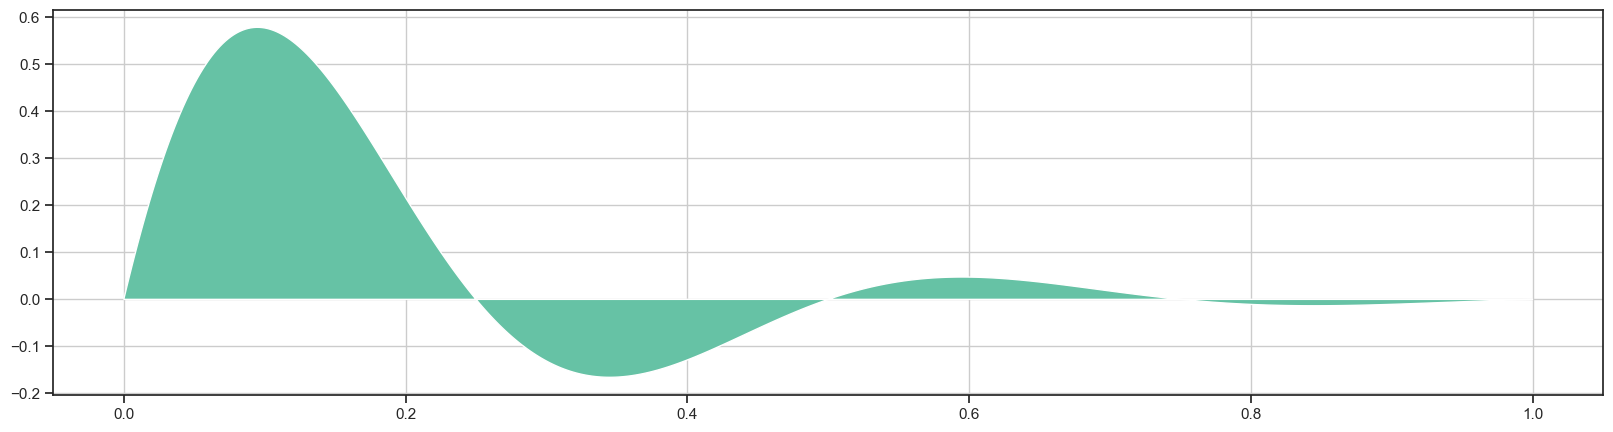

In [98]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in total_import:
     if column != "Argentina" and column != "Indonesia" and column != "Poland":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Columbia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
        
        x_axis = total_import.index
        y_axis = total_import[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=1)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)
plt.rcParams["figure.figsize"] = (20,5)
plt.title("Percent Exports Per Country")
plt.xlabel("Year")
plt.ylabel("Metric Tons")

x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)


plt.savefig("../p_branch_graphs/summary_exports.png",bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

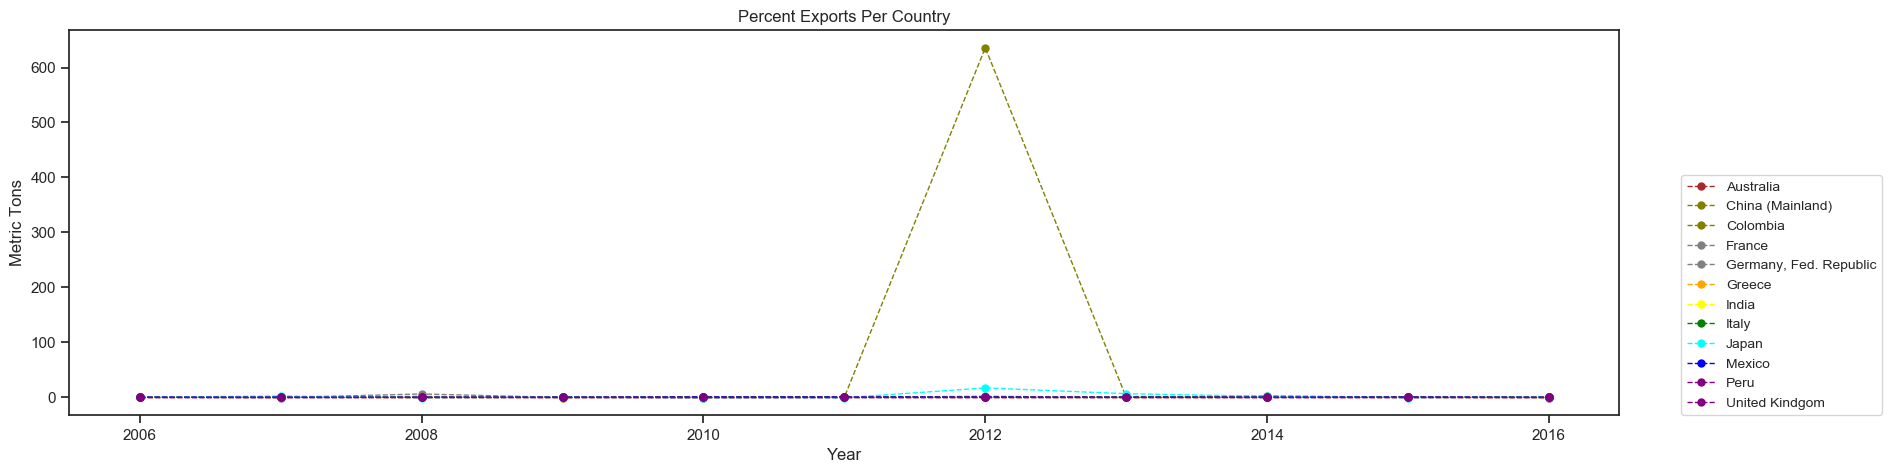

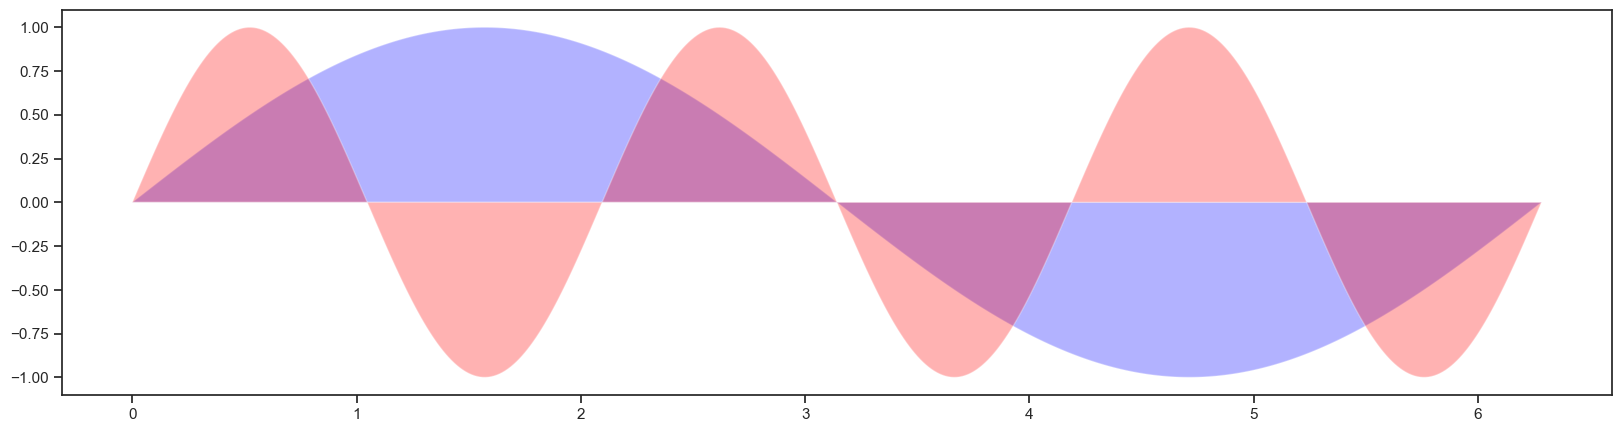

In [99]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []

for column in total_import:
     if column != "Argentina" and column != "Indonesia" and column != "Poland":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Columbia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
        
        x_axis = total_import.index
        y_axis = total_import[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker=marker, markersize=5, linestyle="dashed", linewidth=1)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)
plt.rcParams["figure.figsize"] = (20,5)
plt.title("Percent Exports Per Country")
plt.xlabel("Year")
plt.ylabel("Metric Tons")

x = np.linspace(0, 2 * np.pi, 500)
y1 = np.sin(x)
y2 = np.sin(3 * x)

fig, ax = plt.subplots()
ax.fill(x, y1, 'b', x, y2, 'r', alpha=0.3)


plt.savefig("../p_branch_graphs/summary_exports.png",bbox_inches="tight")
plt.show

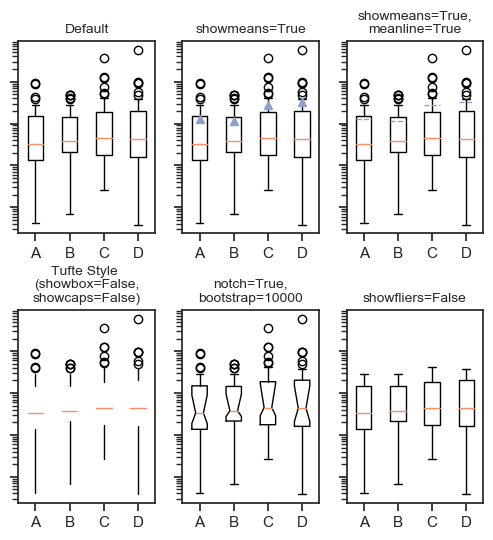

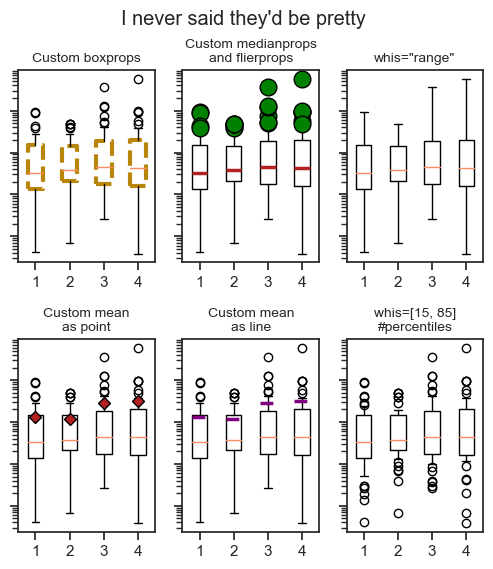

In [100]:
# fake data
np.random.seed(937)
total_import = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(total_import, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(total_import, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(total_import, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(total_import, labels=labels, showbox=False, showcaps=False)
tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
axes[1, 0].set_title(tufte_title, fontsize=fs)

axes[1, 1].boxplot(total_import, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(total_import, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()


# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(data, boxprops=boxprops)
axes[0, 0].set_title('Custom boxprops', fontsize=fs)

axes[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
axes[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axes[0, 2].boxplot(data, whis='range')
axes[0, 2].set_title('whis="range"', fontsize=fs)

axes[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
                   showmeans=True)
axes[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axes[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True,
                   showmeans=True)
axes[1, 1].set_title('Custom mean\nas line', fontsize=fs)

axes[1, 2].boxplot(data, whis=[15, 85])
axes[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()

In [101]:
    def plot(self, xs, ys, *args, zdir='z', **kwargs):
        """
        Plot 2D or 3D data.

        Parameters
        ----------
        xs : 1D array-like
            x coordinates of vertices.
        ys : 1D array-like
            y coordinates of vertices.
        zs : scalar or 1D array-like
            z coordinates of vertices; either one for all points or one for
            each point.
        zdir : {'x', 'y', 'z'}
            When plotting 2D data, the direction to use as z ('x', 'y' or 'z');
            defaults to 'z'.
        **kwargs
            Other arguments are forwarded to `matplotlib.axes.Axes.plot`.
        """
        had_data = self.has_data()

        # `zs` can be passed positionally or as keyword; checking whether
        # args[0] is a string matches the behavior of 2D `plot` (via
        # `_process_plot_var_args`).
        if args and not isinstance(args[0], str):
            zs = args[0]
            args = args[1:]
            if 'zs' in kwargs:
                raise TypeError("plot() for multiple values for argument 'z'")
        else:
            zs = kwargs.pop('zs', 0)

        # Match length
        zs = np.broadcast_to(zs, len(xs))

        lines = super().plot(xs, ys, *args, **kwargs)
        for line in lines:
            art3d.line_2d_to_3d(line, zs=zs, zdir=zdir)

        xs, ys, zs = art3d.juggle_axes(xs, ys, zs, zdir)
        self.auto_scale_xyz(xs, ys, zs, had_data)
        return lines

<function matplotlib.pyplot.show(*args, **kw)>

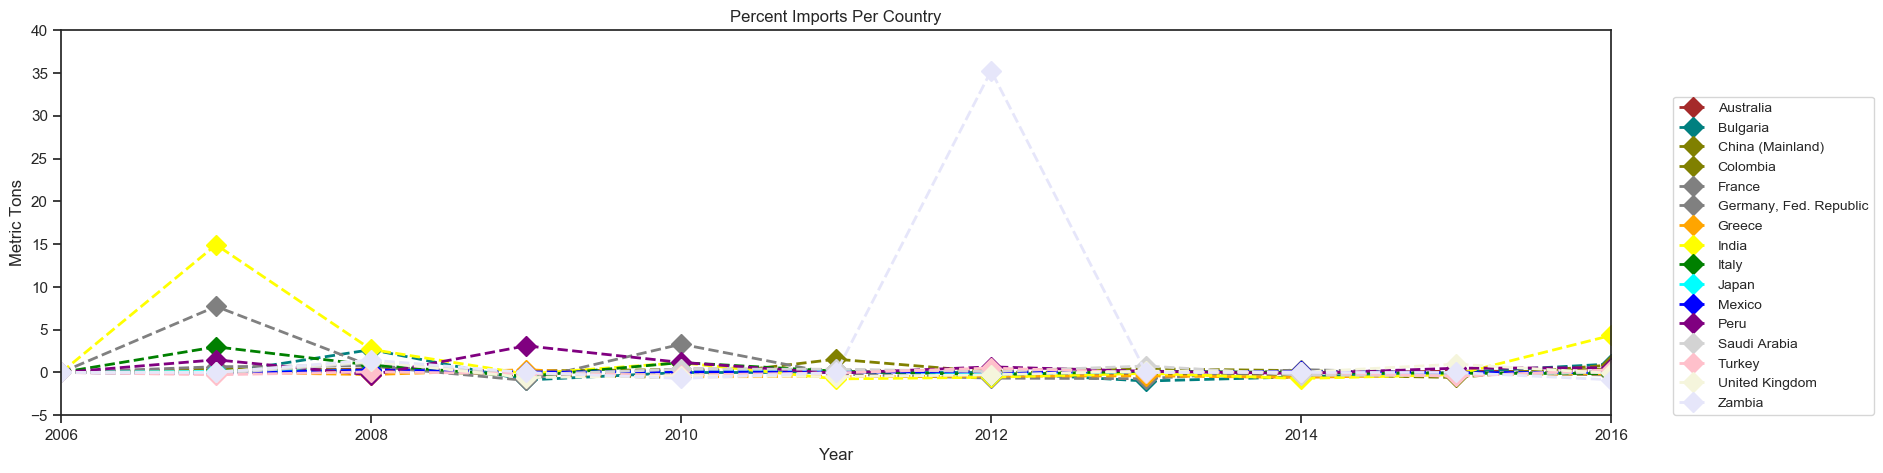

In [102]:
#graph pct change vs. time
color = "brown"
marker = "o"
columns = []


for column in total_export:
     if column != "Argentina" and column != "Indonesia" and column != "Poland":   
        
        if column == 'Argentina':
            color='maroon'
        if column == 'Australia':
            color='brown'
        if column == 'China (Mainland)':
            color='olive'
        if column =='Bulgaria':
            color='teal'
        if column=='Columbia':
            color='navy'
        if column=='France':
            color='grey'
        if columns=='Germany, Fed. Republic':
            color='red'
        if column == 'Greece':
            color='orange'
        if column == 'India':
            color='yellow'
        if column == 'Indonesia':
            color='lime'
        if column =='Italy':
            color='green'
        if column=='Japan':
            color='cyan'
        if column=='Mexico':
            color='blue'
        if column=='Peru':
            color='purple'
        if column == 'Poland':
            color='magenta'
        if column == 'Saudi Arabia':
            color='lightgrey'
        if column =='Turkey':
            color='pink'
        if column=='United Kingdom':
            color='beige'
        if column=='United States':
            color='lightgreen'
        if column=='Zambia':
            color='lavender'
        
        x_axis = total_export.index
        y_axis = total_export[column]
    
        columns.append(column)
    
        plt.errorbar(x_axis, y_axis, color=color, marker='D', markersize=10, linestyle='dashed', linewidth=2)
        
plt.legend(columns,loc=(1.04,0),fontsize="small",fancybox=True)
plt.rcParams["figure.figsize"] = (20,5)
plt.title("Percent Imports Per Country")
plt.xlabel("Year")
plt.ylabel("Metric Tons")

width_in_inches = 2
height_in_inches = 2
dots_per_inch = 70



# Limit the range of the plot to only where the data is.    
# Avoid unnecessary whitespace.    
plt.ylim(-5, 40)    
plt.xlim(2006, 2016)

plt.savefig("../p_branch_graphs/summary_imports.png",bbox_inches="tight")
plt.show